In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    precision_score, recall_score
)

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

In [4]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [5]:
y = y.map({"M": 1, "B": 0})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [10]:
print("\nClassification Report (default threshold=0.5):")
print(classification_report(y_test, y_pred))


Classification Report (default threshold=0.5):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



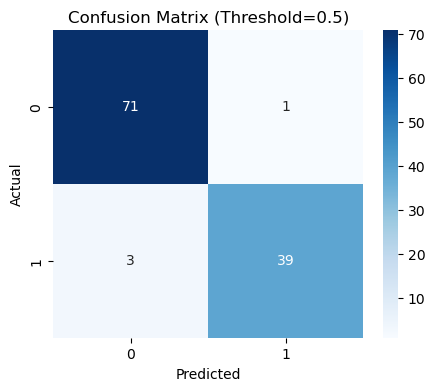

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Threshold=0.5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.97
Recall: 0.93


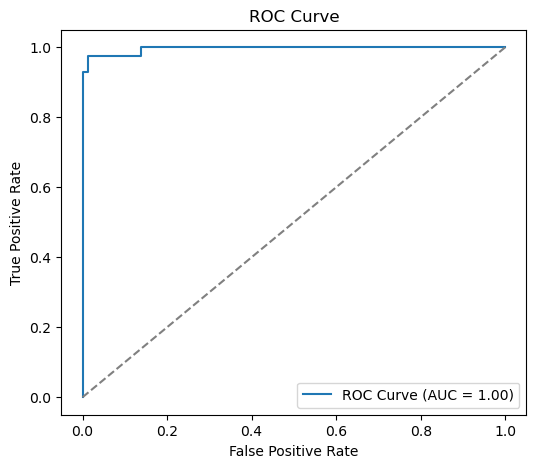

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [14]:
threshold = 0.3
y_pred_custom = (y_pred_proba >= threshold).astype(int)

print(f"\nClassification Report with threshold={threshold}:")
print(classification_report(y_test, y_pred_custom))


Classification Report with threshold=0.3:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



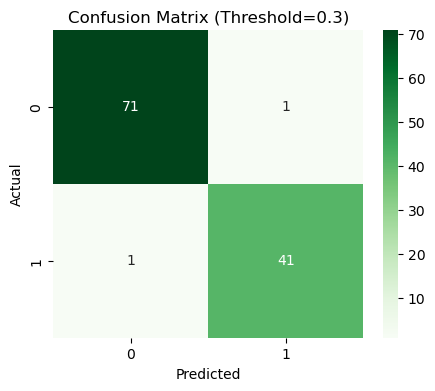

In [15]:
cm_custom = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(5,4))
sns.heatmap(cm_custom, annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix (Threshold={threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()